In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

In [6]:
!pip install IPython 
from IPython.display import Image

In [3]:
titanic = sns.load_dataset('titanic')

In [4]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### 칼럼 분석 

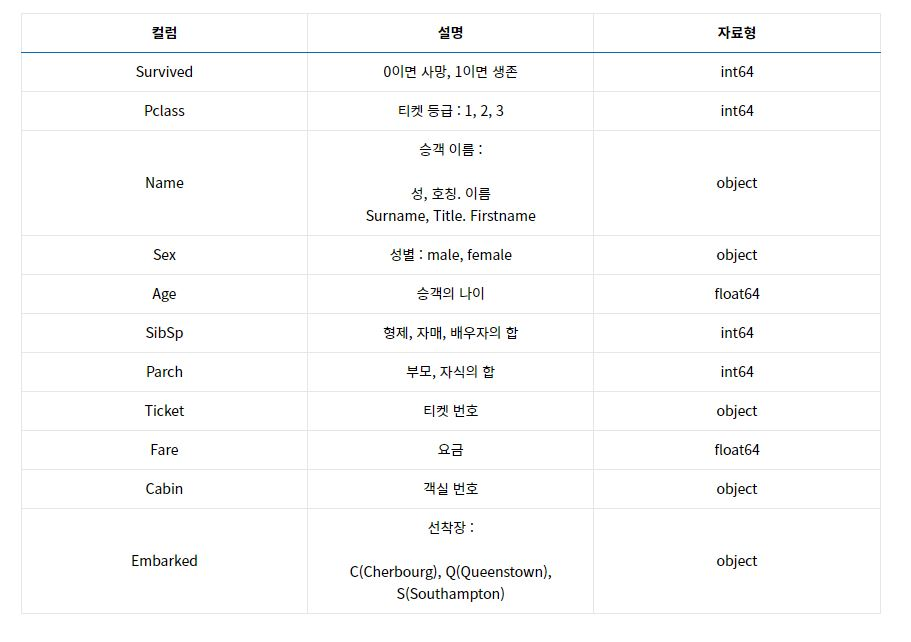

In [8]:
Image("column_titanic.jpg")
"""
추가 설명
embark_town : 어디서 탔는 지 
"""

In [4]:
df = sns.load_dataset('titanic')

In [12]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df.dropna().describe()

,survived,pclass,age,sibsp,parch,fare
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,0.675824,1.192308,35.623187,0.467033,0.478022,78.919735
std,0.469357,0.516411,15.671615,0.645007,0.755869,76.490774
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,1.000000,1.000000,47.750000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [102]:
df.groupby('class').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
class,,,,,,,,,,,,,,
First,216,216,216,186,216,216,216,214,216,216,175,214,216,216
Second,184,184,184,173,184,184,184,184,184,184,16,184,184,184
Third,491,491,491,355,491,491,491,491,491,491,12,491,491,491


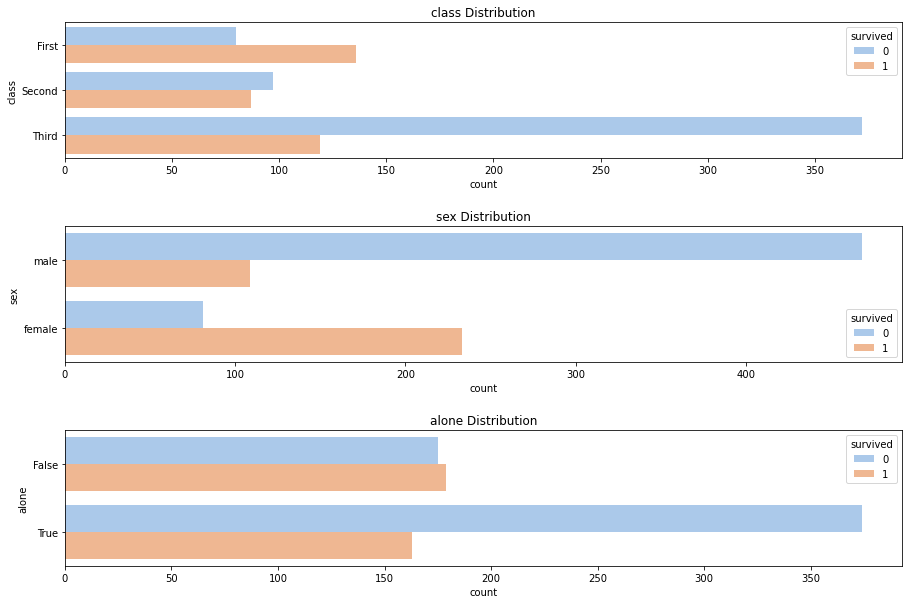

In [101]:
import matplotlib.gridspec as gridspec

grid = gridspec.GridSpec(3,1)
plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.8, hspace=0.5) 

df_features = ['class','sex','alone']

for idx,feature in enumerate(df_features):
    ax= plt.subplot(grid[idx])
    
    sns.countplot(
        y = feature,
        data = df,
        hue = 'survived',
        palette = 'pastel',
        ax= ax)
    ax.set_title(f'{feature} Distribution')
    

### 좌석 등급, 성별, 혼자 탑승했는 지 여부에 따른 생존 여부 확인 

- 1. 좌석 등급
    3,1,2 등급 순서로 많이 탑승 했음을 알 수 있다.
    
    3등급 좌석에 탑승한 승객들이 가장 많이 사망했으며 절대적인 사망자 수는 등급에 비례한다. 
    
    생존율은 1,2,3 등급 순서로 63,46,24%로 등급에 비례해 생존할 확률이 높아 보인다.
    
- 2. 성별
      그래프와 보면 알 수 있 듯이 남성 승객의 사망율과, 사망자수가 압도적으로 높았다.
      


- 3. 혼자 탑승 여부
    혼자 탑승한 승객의 사망자수, 사망률이 압도적으로 높았다. 
    높은 이유에 대해선 여러 가지 이유가 있을 것이다. (ex. 희생적인 이유)
    


-    남성 사망자와 혼자 탑승한 사망자의 경우 세밀한 분석이 필요하다 . ex. 나이별 사망자수 조사
    

In [110]:
df.groupby('class').agg(n=('class','count')) # 등급별 탑승자 수 

,n
class,
First,216
Second,184
Third,491


In [128]:
df.groupby('survived').agg(n=('pclass','count')) # 전체 생존,사망자 수 

,n
survived,
0,549
1,342


In [143]:
df.query('pclass==3').groupby('survived').agg(third=('pclass','count')) # 3등급 좌석 생존자율 = 24%

,third
survived,
0,372
1,119


In [133]:
df.query('pclass==2').groupby('survived').agg(second=('pclass','count')) # 2등급 좌석 생존자율 =  46.5 %

,second
survived,
0,97
1,87


In [148]:
df.query('pclass==1').groupby('survived').agg(first=('pclass','count')) #1등급 좌석 생존자율 = 63% 

,first
survived,
0,80
1,136


In [22]:
age_d = []
dead = []
dead_m =[]

In [23]:
cnt1 = df.query("age <10 and age >=0 ")
age_d.append(cnt1['alive'].count())
cnt2 = cnt1.query("survived ==0") 
dead.append(cnt2['alive'].count())
cnt3 = cnt2.query("who=='man'")
dead_m.append(cnt3['alive'].count())

In [24]:
cnt1 = df.query("age <20 and age >=10 ")
age_d.append(cnt1['alive'].count())
cnt2 = cnt1.query("survived ==0") 
dead.append(cnt2['alive'].count())
cnt3 = cnt2.query("who=='man'")
dead_m.append(cnt3['alive'].count())

In [25]:
cnt1 = df.query("age <30 and age >=20 ")
age_d.append(cnt1['alive'].count())
cnt2 = cnt1.query("survived ==0") 
dead.append(cnt2['alive'].count())
cnt3 = cnt2.query("who=='man'")
dead_m.append(cnt3['alive'].count())

In [26]:
cnt1 = df.query("age <40 and age >=30 ")
age_d.append(cnt1['alive'].count())
cnt2 = cnt1.query("survived ==0") 
dead.append(cnt2['alive'].count())
cnt3 = cnt2.query("who=='man'")
dead_m.append(cnt3['alive'].count())

In [27]:
cnt1 = df.query("age <50 and age >=40 ")
age_d.append(cnt1['alive'].count())
cnt2 = cnt1.query("survived ==0") 
dead.append(cnt2['alive'].count())
cnt3 = cnt2.query("who=='man'")
dead_m.append(cnt3['alive'].count())

In [28]:
cnt1 = df.query("age <60 and age >=50 ")
age_d.append(cnt1['alive'].count())
cnt2 = cnt1.query("survived ==0") 
dead.append(cnt2['alive'].count())
cnt3 = cnt2.query("who=='man'")
dead_m.append(cnt3['alive'].count())

In [29]:
cnt1 = df.query("age <70 and age >=60 ")
age_d.append(cnt1['alive'].count())
cnt2 = cnt1.query("survived ==0") 
dead.append(cnt2['alive'].count())
cnt3 = cnt2.query("who=='man'")
dead_m.append(cnt3['alive'].count())

In [30]:
cnt1 = df.query("age <=80 and age >=70 ")
age_d.append(cnt1['alive'].count())
cnt2 = cnt1.query("survived ==0") 
dead.append(cnt2['alive'].count())
cnt3 = cnt2.query("who=='man'")
dead_m.append(cnt3['alive'].count())

In [31]:
display(age_d)
display(dead)
display(dead_m)

[62, 102, 220, 167, 89, 48, 19, 7]

[24, 61, 143, 94, 55, 28, 13, 6]

[0, 44, 123, 84, 45, 26, 13, 6]

In [39]:
drate = []
for i in range(8):
    drate.append(dead[i]/age_d[i]*100)
drate

[38.70967741935484,
 59.80392156862745,
 65.0,
 56.287425149700596,
 61.79775280898876,
 58.333333333333336,
 68.42105263157895,
 85.71428571428571]

Text(0.5, 1.0, 'Death rate by age')

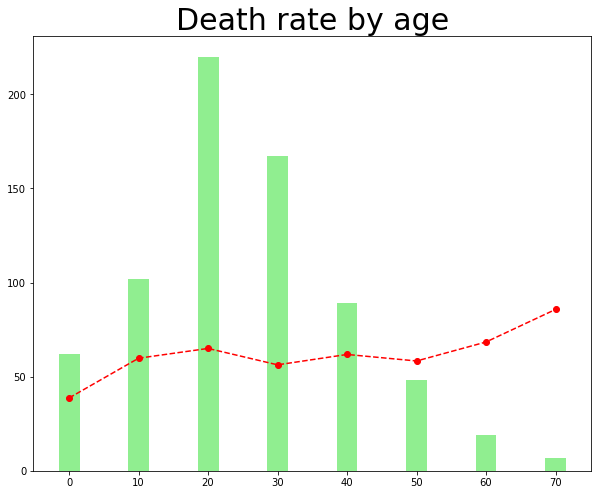

In [40]:
fig = plt.figure(figsize=(10,8)) ## Figure 생성 

xtick_label_position = list(range(0,80,10))
plt.plot(xtick_label_position, drate, color='r',
         linestyle='--', marker='o') ## 선 그래프 출력
plt.bar(xtick_label_position, age_d, width =3.0, color ='lightgreen') ## 바차트 출력
plt.title("Death rate by age", size = 30)

Text(0.5, 1.0, 'Death num by age')

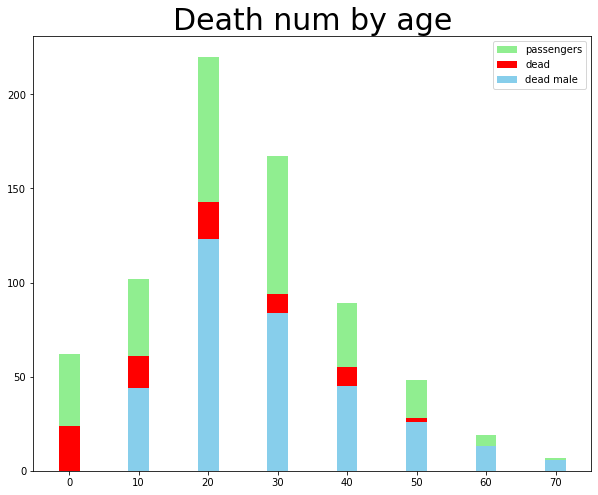

In [37]:
fig = plt.figure(figsize=(10,8)) ## Figure 생성 

xtick_label_position = list(range(0,80,10))

plt.bar(xtick_label_position, age_d, width =3.0, color ='lightgreen',label = 'passengers') 
plt.bar(xtick_label_position, dead, color='r',width =3.0, label = 'dead') ## 선 그래프 출력
plt.bar(xtick_label_position, dead_m, color='skyblue',width =3.0, label = 'dead male') ## 선 그래프 출력
plt.legend()

plt.title("Death num by age", size = 30)

### 나이별 사망률 통계
 - 70대의 사망률이 가장 높으나 표본 수가 적다. 
 
 
 - 0~9세를 제외하고 50%가 넘는 사망률을 보이며 이 나이대를 제외하고 모든 구간에서 사망자 중 대부분이 남성이었음을 알 수 있다.

In [36]:
df.groupby('sibsp')['survived'].mean()

sibsp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: survived, dtype: float64

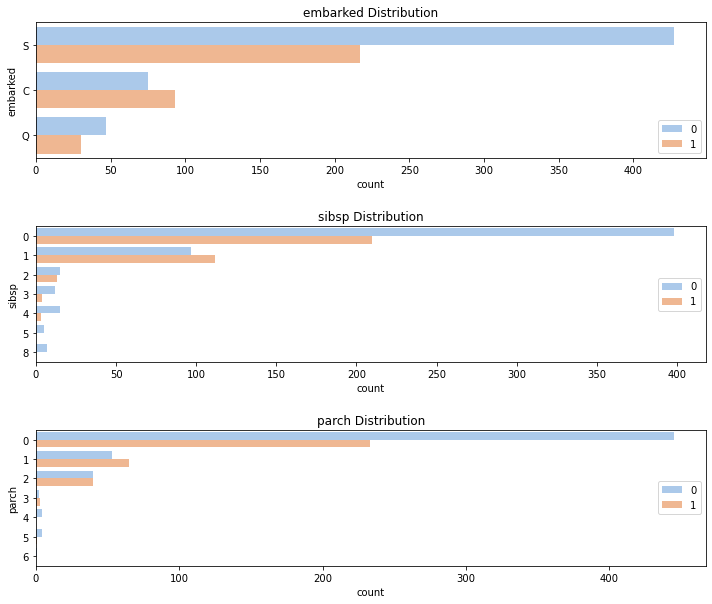

In [41]:
grid = gridspec.GridSpec(3,1)
plt.figure(figsize=(12,10))
plt.subplots_adjust(wspace=0.8, hspace=0.5) 

df_features = ['embarked','sibsp','parch']

for idx,feature in enumerate(df_features):
    ax= plt.subplot(grid[idx])
    
    sns.countplot(
        y = feature,
        data = df,
        hue = 'survived',
        palette = 'pastel',
        ax= ax)
    ax.set_title(f'{feature} Distribution')
    plt.legend()

### 탑승지, 형제, 자매 및 배우자의 합, 부모 및 자식의 합에 따른 생존 여부

- 형제, 자매 배우자 or 부모나 자식이 없는 사람들의 사망자수가 가장 많았음 , 이는 alone = true와 연계되는 통계

- 선착장은 사우스햄튼에서 탑승한 사람들의 사망 통계가 가장 높았다. 하지만 이 통계가 사망 원인과 유의미한 연관성이 있는 지는 미지수